In [2]:
import numpy as np
import pandas as pd

sufijo_archivos_datos = ["01-2024.csv", "02-2024.csv", "03-2024.csv", "04-2024.csv", "05-2024.csv", "06-2024.csv", "07-2024.csv", "08-2024.csv", "09-2024.csv", "10-2024.csv", "11-2024.csv", "12-2024.csv"]
prefijo = '~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_'
dataframes = []
for sad in sufijo_archivos_datos:
    nombre_archivo = prefijo + sad
    print(nombre_archivo)
    df = pd.read_csv(nombre_archivo, sep=';', quotechar='"')
    dataframes.append(df)

df_completo = pd.concat(dataframes, ignore_index=True)

print(df_completo.head())

~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_01-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_02-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_03-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_04-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_05-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_06-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_07-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_08-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_09-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_10-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_11-2024.csv
~/ubuntu_transfer/temporal_series/sensores_madrid/2024/historico/m30_12-2024.csv
     id                fecha

In [3]:
print(df_completo.describe())

                 id    intensidad     ocupacion         carga          vmed  \
count  9.579712e+06  9.579712e+06  9.579712e+06  9.579712e+06  9.468920e+06   
mean   6.571184e+03  1.294700e+03  5.492410e+00  3.628018e+01  6.844658e+01   
std    1.773205e+03  1.313854e+03  7.096858e+00  2.752633e+01  2.162816e+01   
min    3.488000e+03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.655000e+03  2.810000e+02  1.000000e+00  1.100000e+01  5.900000e+01   
50%    6.734000e+03  8.310000e+02  4.000000e+00  3.200000e+01  7.400000e+01   
75%    6.808000e+03  1.953000e+03  8.000000e+00  5.800000e+01  8.400000e+01   
max    1.066200e+04  8.452000e+03  1.000000e+02  1.000000e+02  2.350000e+02   

       periodo_integracion  
count         9.579712e+06  
mean          1.492618e+01  
std           8.044807e-01  
min           1.000000e+00  
25%           1.500000e+01  
50%           1.500000e+01  
75%           1.500000e+01  
max           3.000000e+01  


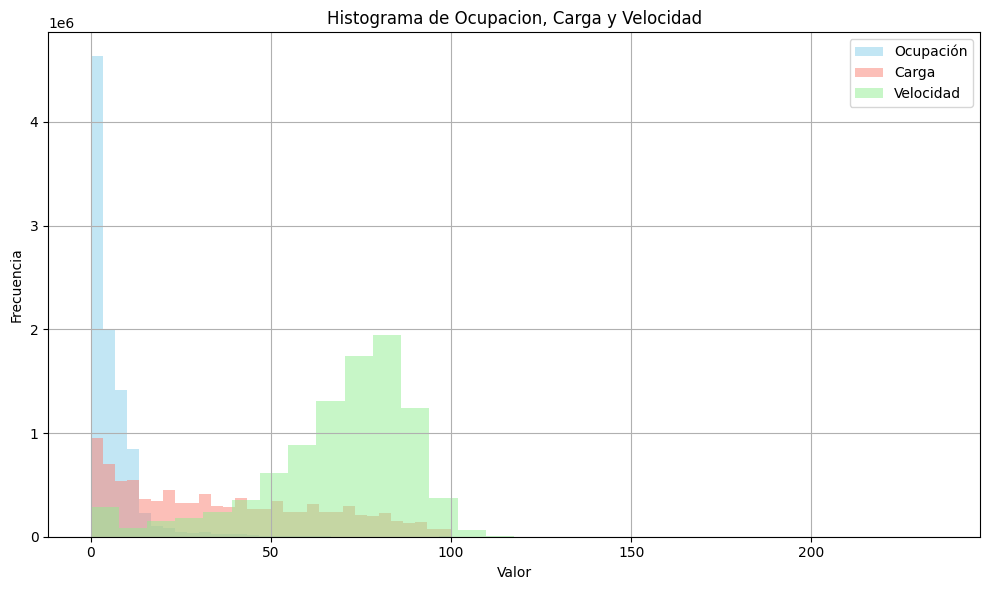

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df_completo["ocupacion"], bins=30, alpha=0.5, label="Ocupación", color="skyblue")
plt.hist(df_completo["carga"], bins=30, alpha=0.5, label="Carga", color="salmon")
plt.hist(df_completo["vmed"], bins=30, alpha=0.5, label="Velocidad", color="lightgreen")

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de Ocupacion, Carga y Velocidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

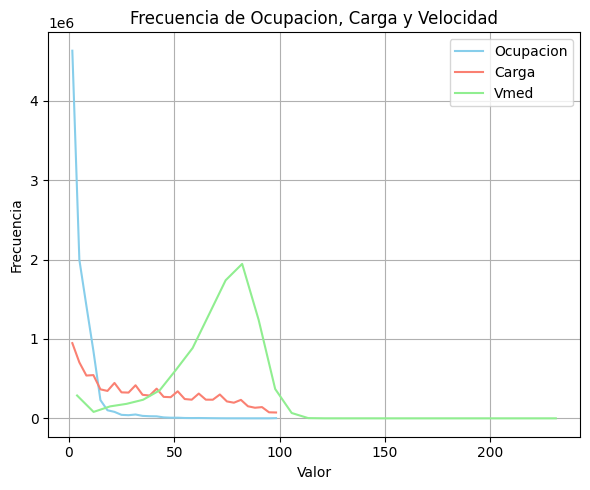

In [21]:
plt.figure(figsize=(6, 5))
for columna, color in zip(["ocupacion", "carga", "vmed"], ["skyblue", "salmon", "lightgreen"]):
    valores = df_completo[columna].dropna()
    counts, bins = np.histogram(valores, bins=30, density=False)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(bin_centers, counts, label=columna.capitalize(), color=color)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Ocupacion, Carga y Velocidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('histograma_2024_ocupacion-carga-vmed.png', bbox_inches='tight')
plt.close()

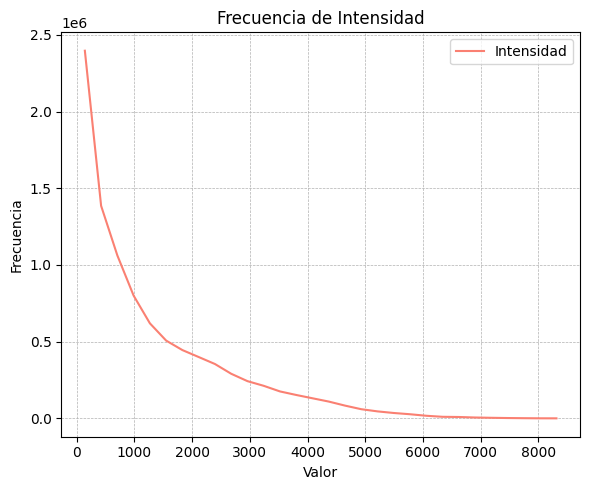

In [23]:
plt.figure(figsize=(6, 5))
valores = df_completo["intensidad"].dropna()
counts, bins = np.histogram(valores, bins=30, density=False)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.plot(bin_centers, counts, label="intensidad".capitalize(), color="salmon")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Intensidad")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()
plt.savefig('histograma_2024_intensidad.png', bbox_inches='tight')
plt.close()